In [2]:
import os
import numpy as np

In [3]:
path = 'data'    

In [4]:
import librosa

In [5]:
samples, sample_rate = librosa.load(path+'/eight-2018-05-30T11_28_25.746Z.wav', sr = 16000)


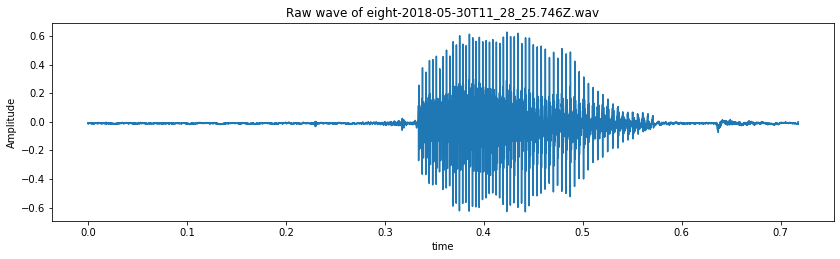

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + 'eight-2018-05-30T11_28_25.746Z.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), 22292), samples)

In [7]:
import IPython.display as ipd
ipd.Audio(samples, rate=sample_rate)

In [8]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

In [9]:
#find count of each label and plot bar graph
label = ["zero","one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

In [10]:
recordings = []
no_of_recordings = np.zeros(len(label))
i = 0
for item in os.listdir(path):
    if item.startswith(label[0]):
        recordings.append(label[0])
        no_of_recordings[0] = no_of_recordings[0] + 1
    if item.startswith(label[1]):
        recordings.append(label[1])
        no_of_recordings[1] = no_of_recordings[1] + 1
    if item.startswith(label[2]):
        recordings.append(label[2])
        no_of_recordings[2] = no_of_recordings[2] + 1
    if item.startswith(label[3]):
        recordings.append(label[3])
        no_of_recordings[3] = no_of_recordings[3] + 1
    if item.startswith(label[4]):
        recordings.append(label[4])
        no_of_recordings[4] = no_of_recordings[4] + 1
    if item.startswith(label[5]):
        recordings.append(label[5])
        no_of_recordings[5] = no_of_recordings[5] + 1
    if item.startswith(label[6]):
        recordings.append(label[6])
        no_of_recordings[6] = no_of_recordings[6] + 1
    if item.startswith(label[7]):
        recordings.append(label[7])
        no_of_recordings[7] = no_of_recordings[7] + 1
    if item.startswith(label[8]):
        recordings.append(label[8]) 
        no_of_recordings[8] = no_of_recordings[8] + 1
    if item.startswith(label[9]):
        recordings.append(label[9])
        no_of_recordings[9] = no_of_recordings[9] + 1
    i = i + 1

In [11]:
recordings = np.array(recordings)

In [12]:
print(recordings.shape)
print(i)

(330,)
330


In [13]:
no_of_recordings

array([38., 37., 31., 34., 32., 32., 31., 31., 31., 33.])

Text(0, 0.5, 'How many')

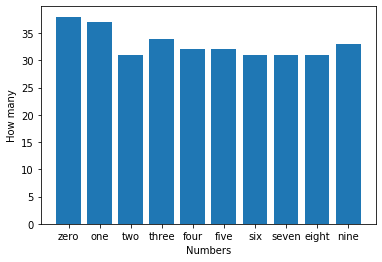

In [14]:
#plotting the graph
plt.bar(label, no_of_recordings)
plt.xlabel('Numbers')
plt.ylabel('How many')

In [16]:

all_wave = []
all_label = []
for lb in label:
    print(lb)
    waves = [f for f in os.listdir(path)]
    for wav in waves:
        samples, sample_rate = librosa.load(path + '/' +wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples) == 8000):
            all_wave.append(samples)
            all_label.append(label)

zero
one
two
three
four
five
six
seven
eight
nine


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(all_label)
classes = list(le.classes_)

In [19]:
from keras.utils import np_utils
y = np_utils.to_categorical(y, num_classes = len(label))

In [20]:
all_wave = np.array(all_wave).reshape(-1,8000,1)


In [29]:

from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2, train_size = 0.8, random_state=0,shuffle=True)

ValueError: With n_samples=0, test_size=0.2 and train_size=0.8, the resulting train set will be empty. Adjust any of the aforementioned parameters.